In [1]:
## explore the OSMnx package

# pip install contextily

import osmnx as ox
import folium
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
# This is using the Nominatim API to find the place by name and geocode it.
# Nominatim is the search engine that powers the search bar on openstreetmap.org.

PLACE_NAME = 'Charlottenburg, Charlottenburg-Wilmersdorf, Berlin, Germany'

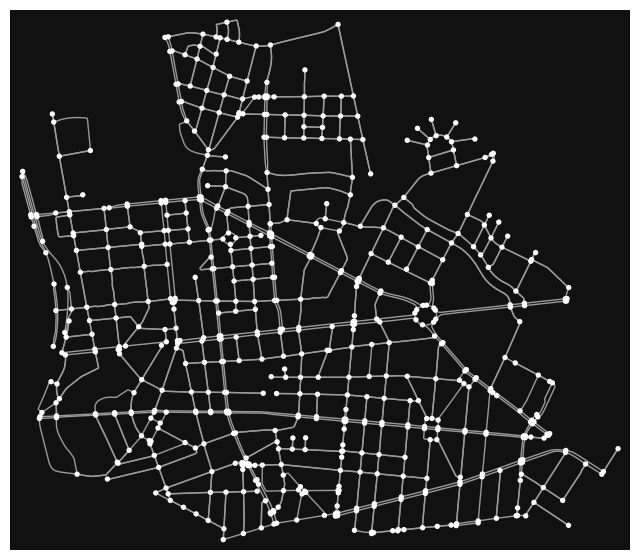

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
## Show Charlottenburg road network

G = ox.graph_from_place(PLACE_NAME, network_type='drive')
ox.plot_graph(G) 

In [4]:
## plot the roads on a basemap
ox.plot_graph_folium(G)

/tmp/ipykernel_9126/2220924703.py:2: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx usage example repo for complete details and demonstrations.
  ox.plot_graph_folium(G)


In [8]:
ox.graph_to_gdfs(G, nodes=False).explore()

In [9]:
## plot the bike network on a basemap

# G = ox.graph_from_place(PLACE_NAME, network_type='bike')
# type(G)
# ox.plot_graph_folium(G)

In [10]:
## create edge and node dataframes from road graph object
area,edges = ox.graph_to_gdfs(G)
area.head(2)

y          x  ref            highway  street_count  \
osmid                                                                
458330  52.511557  13.286217    7  motorway_junction             3   
458334  52.514265  13.286467  NaN                NaN             3   

                         geometry  
osmid                              
458330  POINT (13.28622 52.51156)  
458334  POINT (13.28647 52.51426)

In [12]:
edges.head(2)

osmid  oneway lanes        highway maxspeed reversed  \
u      v        key                                                             
458330 26708458 0      4434508    True     2  motorway_link       50    False   
       458334   0    227985278    True     3       motorway       60    False   

                      length  \
u      v        key            
458330 26708458 0    166.618   
       458334   0    302.682   

                                                              geometry    ref  \
u      v        key                                                             
458330 26708458 0    LINESTRING (13.28622 52.51156, 13.28640 52.511...    NaN   
       458334   0    LINESTRING (13.28622 52.51156, 13.28637 52.512...  A 100   

                    bridge name width junction access tunnel  
u      v        key                                           
458330 26708458 0      NaN  NaN   NaN      NaN    NaN    NaN  
       458334   0      NaN  NaN   NaN      NaN    NaN    NaN

In [15]:
area.explore()

In [16]:
## extract benches from the area

benches = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'bench'})
benches.head(2)

amenity backrest                   geometry colour  \
element_type osmid                                                          
node         540048258   bench      yes  POINT (13.29559 52.50190)    NaN   
             540048259   bench      yes  POINT (13.29630 52.50167)    NaN   

                       material seats check_date direction level indoor  ...  \
element_type osmid                                                       ...   
node         540048258      NaN   NaN        NaN       NaN   NaN    NaN  ...   
             540048259      NaN   NaN        NaN       NaN   NaN    NaN  ...   

                        bin manufacturer name operator access survey:date  \
element_type osmid                                                          
node         540048258  NaN          NaN  NaN      NaN    NaN         NaN   
             540048259  NaN          NaN  NaN      NaN    NaN         NaN   

                       nodes area barrier height  
element_type osmid                                
node         540048258   NaN  NaN     NaN    NaN  
             540048259   NaN  NaN     NaN    NaN  

[2 rows x 24 columns]

In [17]:
type(benches)

geopandas.geodataframe.GeoDataFrame

In [18]:
## extract parks from the area

parks = ox.geometries_from_place(PLACE_NAME, tags={'leisure':'park'})
parks.head();
# parks

In [19]:
## extract water fountains from the area

water_fountains = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'drinking_water'})
water_fountains.head();


In [20]:
## extract fuel stations from the area

fuel_stations = ox.geometries_from_place(PLACE_NAME, {"amenity": "fuel"})
fuel_stations.head();

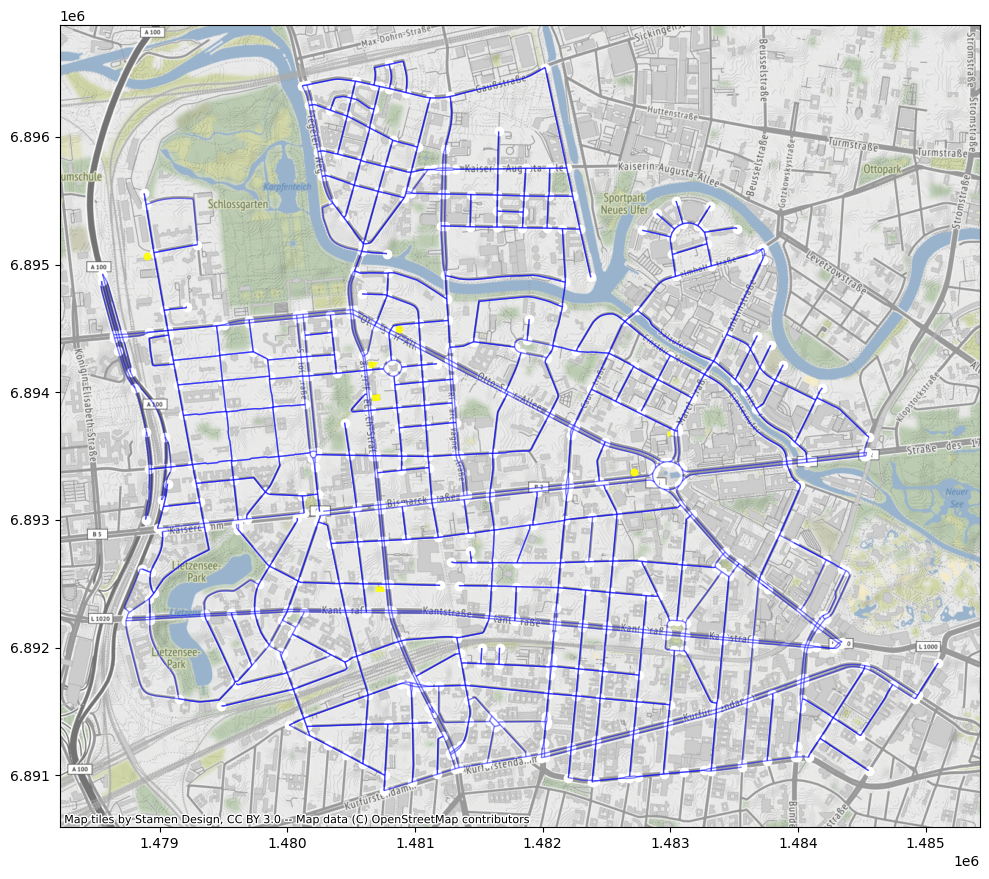

In [21]:
## show all the fuel stations on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
fuel_stations_crs = fuel_stations.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
fuel_stations_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())

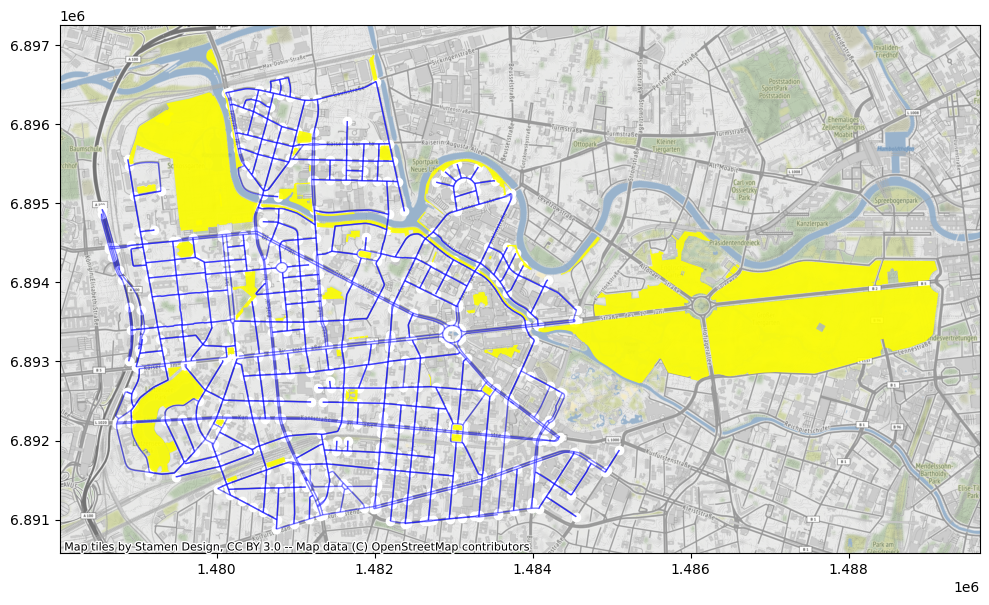

In [22]:
## show all the parks on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
parks_crs = parks.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
parks_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())

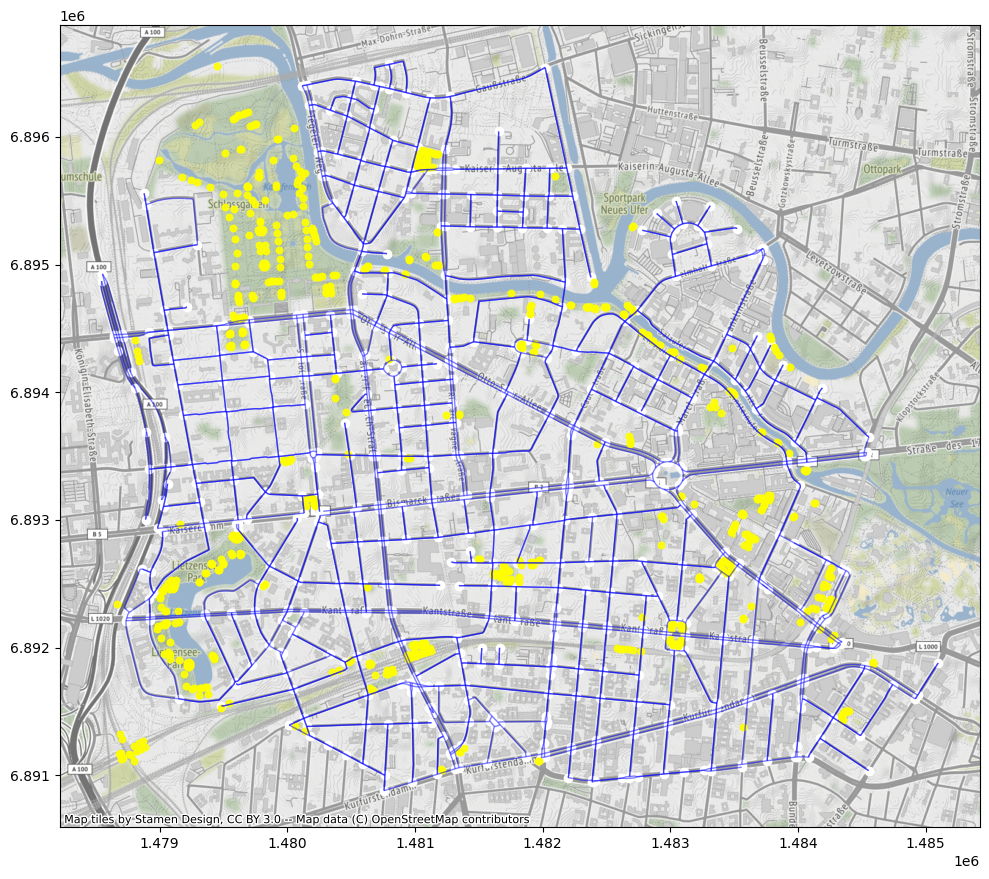

In [23]:
## show the benches on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
benches_crs = benches.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
benches_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())



In [27]:
## geocode_to_gdf allows you to use nominatim api to geocode a place name.
## https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geocoder.geocode_to_gdf

origin = (
    ox.geocode_to_gdf("zoologischer garten")
    .to_crs(edges.crs)  
    .at[0, "geometry"]  
    .centroid  
)

destination = (
    ox.geocode_to_gdf("Charlottenburg, Berlin, Germany")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid 
)

origin_node_id = ox.nearest_nodes(G, origin.x, origin.y)
destination_node_id = ox.nearest_nodes(G, destination.x, destination.y)

ImportError: scikit-learn must be installed to search an unprojected graph

In [25]:
route = ox.shortest_path(G, origin_node_id, destination_node_id)
route;

NameError: name 'origin_node_id' is not defined

In [ ]:
## create a route passes all the water fountains
route = ox.shortest_path(G, origin_node_id, destination_node_id, weight="length")
route;

In [ ]:
ox.plot_route_folium(G, route, route_linewidth=6, node_size=0)
# ox.plot_route_folium(G, extended_route, route_linewidth=6, node_size=0)

In [ ]:
# pip install overpy

## running a single query without osmnx
## use overpy to extract all the benches in a grid located around DSR

import overpy
api = overpy.Overpass()
result = api.query("""
            [out:json];
                node["amenity"="bench"](52.495,13.32,52.51,13.35);
            out body;
            >;
            out skel qt;
            """)

len(result.nodes)